In [304]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [305]:
covid19_aux_df = pd.read_csv('210714COVID19MEXICO.csv')

In [12]:
size_df = len(covid19_aux_df.index)

In [306]:
covid19_df = covid19_aux_df[['ID_REGISTRO','FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_DEF','EDAD','NACIONALIDAD','DIABETES','OBESIDAD','TABAQUISMO']]

In [307]:
covid19_df['DECESOS'] = covid19_df['FECHA_DEF'] != '9999-99-99'

In [308]:
covid19_df['RANGO_EDAD'] = (covid19_df['EDAD'] / 10).astype(int)*10

In [18]:
covid19_df.head()

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_DEF,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,RANGO_EDAD
0,z482b8,2021-07-14,2020-10-16,9999-99-99,41,1,2,2,2,False,40
1,z49a69,2021-07-14,2020-07-20,2020-07-21,66,1,1,1,2,True,60
2,z23d9d,2021-07-14,2021-01-05,9999-99-99,29,1,2,98,2,False,20
3,z24953,2021-07-14,2020-10-15,9999-99-99,40,1,2,2,2,False,40
4,zz8e77,2021-07-14,2020-04-16,9999-99-99,34,1,2,2,2,False,30


In [287]:
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586118 entries, 0 to 7586117
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID_REGISTRO          object
 1   FECHA_ACTUALIZACION  object
 2   FECHA_INGRESO        object
 3   FECHA_DEF            object
 4   EDAD                 int64 
 5   NACIONALIDAD         int64 
 6   DIABETES             int64 
 7   OBESIDAD             int64 
 8   TABAQUISMO           int64 
 9   DECESOS              bool  
dtypes: bool(1), int64(5), object(4)
memory usage: 528.1+ MB


In [309]:
covid19_df = covid19_df.sort_values(by=['FECHA_INGRESO'], ascending = True) 

In [311]:
covid19_df['FECHA_INGRESO_DATETIME'] = covid19_df['FECHA_INGRESO']
covid19_df.head(10)

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_DEF,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,RANGO_EDAD,FECHA_INGRESO_DATETIME
106467,0b20fb,2021-07-14,2020-01-01,9999-99-99,13,2,2,2,2,False,10,2020-01-01
219,040b7b,2021-07-14,2020-01-01,9999-99-99,13,1,2,2,2,False,10,2020-01-01
570,0890cd,2021-07-14,2020-01-01,9999-99-99,51,1,1,2,2,False,50,2020-01-01
108154,12f35c,2021-07-14,2020-01-01,9999-99-99,10,1,2,2,2,False,10,2020-01-01
1387,03706c,2021-07-14,2020-01-01,2020-01-10,6,1,2,2,2,True,0,2020-01-01
320,0011e7,2021-07-14,2020-01-01,9999-99-99,34,1,2,2,2,False,30,2020-01-01
106431,0f9141,2021-07-14,2020-01-01,9999-99-99,39,1,2,2,2,False,30,2020-01-01
277,12f4b5,2021-07-14,2020-01-01,9999-99-99,24,1,2,2,2,False,20,2020-01-01
400,0d4624,2021-07-14,2020-01-01,2020-01-19,64,1,2,2,2,True,60,2020-01-01
230,0e4508,2021-07-14,2020-01-01,9999-99-99,63,1,2,1,2,False,60,2020-01-01


In [312]:
covid19_df['FECHA_INGRESO_DATETIME'] = pd.to_datetime(covid19_df['FECHA_INGRESO_DATETIME'], format='%Y-%m-%d')

In [22]:
covid19_df.head(5)

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_DEF,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,RANGO_EDAD,FECHA_INGRESO_DATETIME
106467,0b20fb,2021-07-14,2020-01-01,9999-99-99,13,2,2,2,2,False,10,2020-01-01
219,040b7b,2021-07-14,2020-01-01,9999-99-99,13,1,2,2,2,False,10,2020-01-01
570,0890cd,2021-07-14,2020-01-01,9999-99-99,51,1,1,2,2,False,50,2020-01-01
108154,12f35c,2021-07-14,2020-01-01,9999-99-99,10,1,2,2,2,False,10,2020-01-01
1387,03706c,2021-07-14,2020-01-01,2020-01-10,6,1,2,2,2,True,0,2020-01-01


In [412]:
final_covid19_df = None
final_covid19_df = covid19_df
final_covid19_df['CASOS'] = 1
final_covid19_df.head(5)

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_DEF,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,RANGO_EDAD,FECHA_INGRESO_DATETIME,NUMERO_CASOS
106467,0b20fb,2021-07-14,2020-01-01,9999-99-99,13,2,2,2,2,False,10,2020-01-01,1
219,040b7b,2021-07-14,2020-01-01,9999-99-99,13,1,2,2,2,False,10,2020-01-01,1
570,0890cd,2021-07-14,2020-01-01,9999-99-99,51,1,1,2,2,False,50,2020-01-01,1
108154,12f35c,2021-07-14,2020-01-01,9999-99-99,10,1,2,2,2,False,10,2020-01-01,1
1387,03706c,2021-07-14,2020-01-01,2020-01-10,6,1,2,2,2,True,0,2020-01-01,1


In [413]:
final_covid19_df = final_covid19_df.groupby(['FECHA_INGRESO_DATETIME']).sum().reset_index()
final_covid19_df.head(5)

,FECHA_INGRESO_DATETIME,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,RANGO_EDAD,NUMERO_CASOS
0,2020-01-01,1623,38,165,70,72,7,1450,37
1,2020-01-02,4210,130,242,249,250,7,3670,129
2,2020-01-03,7262,212,400,401,409,12,6350,212
3,2020-01-04,2698,80,246,248,251,4,2390,80
4,2020-01-05,5470,138,249,260,263,13,4900,138


In [414]:
final_covid19_df = final_covid19_df[['FECHA_INGRESO_DATETIME','CASOS','DECESOS','RANGO_EDAD']]

In [350]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='FECHA_INGRESO_DATETIME'>

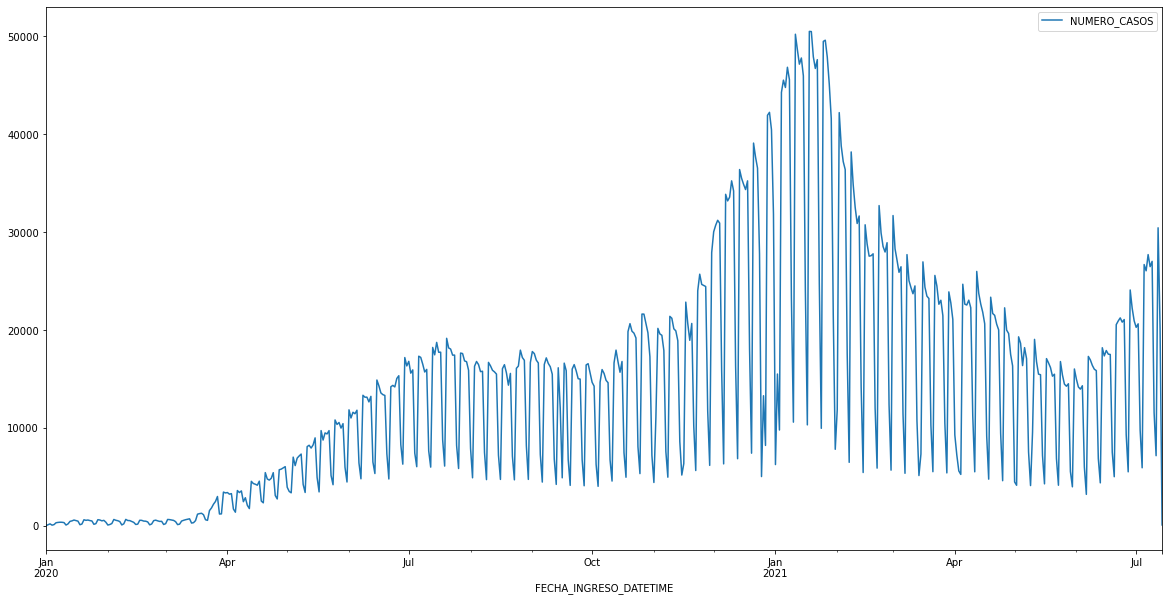

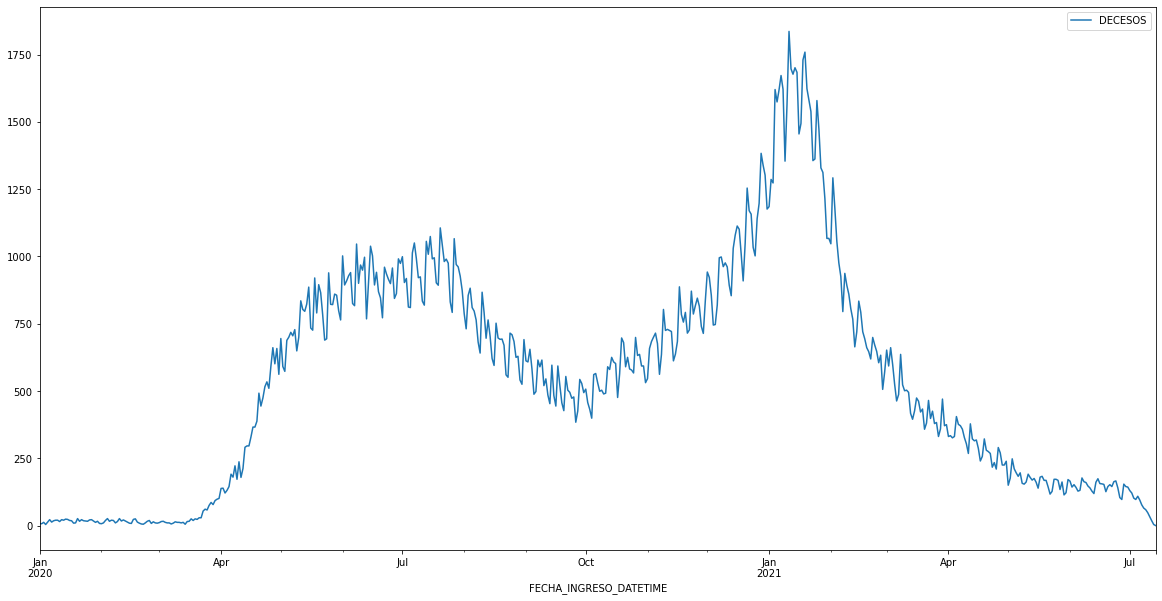

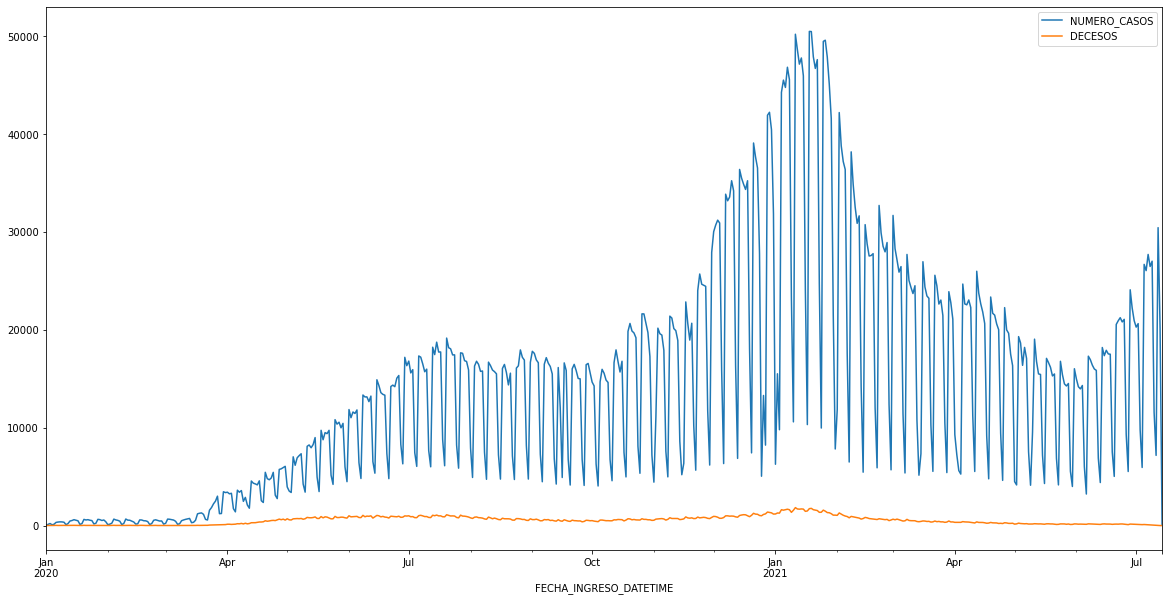

In [415]:
final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y=['CASOS'], figsize=(20,10))
final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y=['DECESOS'], figsize=(20,10))
final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y=['CASOS', 'DECESOS'], figsize=(20,10))

<AxesSubplot:xlabel='FECHA_INGRESO_DATETIME'>

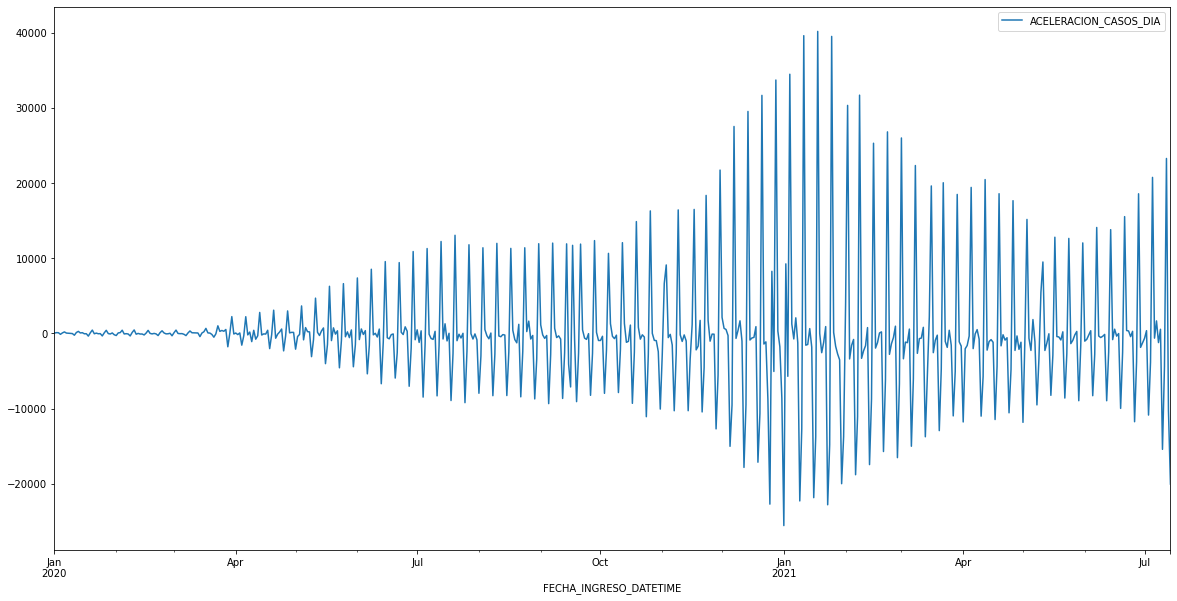

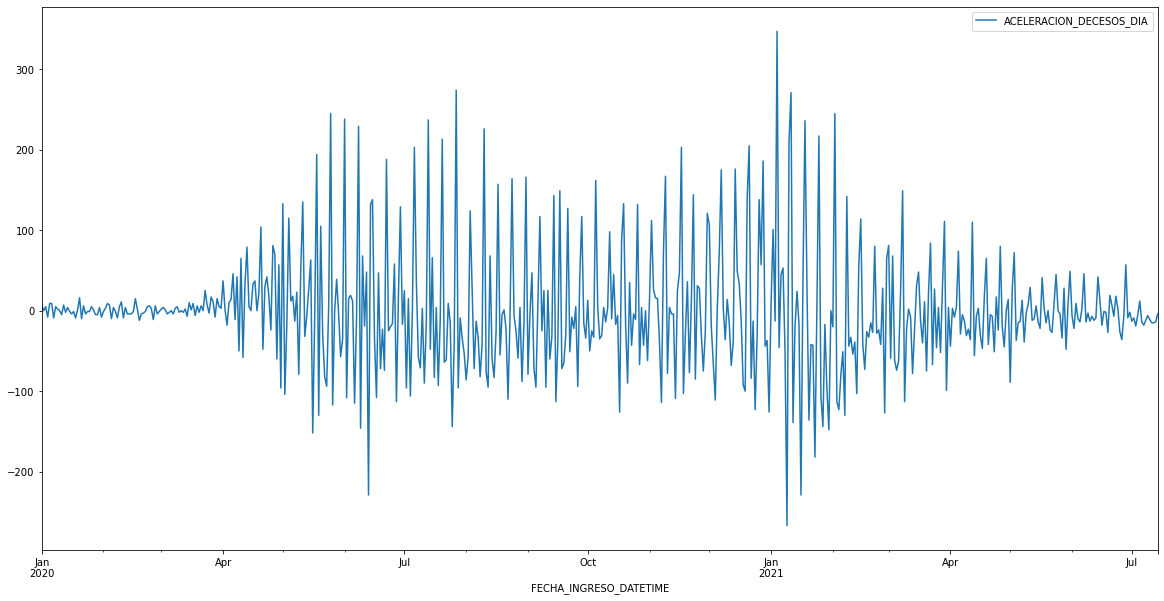

In [418]:
def calcular_aceleracion():
    final_covid19_df['ACELERACION_CASOS_DIA'] = final_covid19_df['CASOS']
    final_covid19_df['ACELERACION_DECESOS_DIA'] = final_covid19_df['DECESOS']
    final_covid19_df['ACELERACION_CASOS_DIA'][0] = final_covid19_df['CASOS'][0]
    final_covid19_df['ACELERACION_DECESOS_DIA'][0] = final_covid19_df['DECESOS'][0]

    for index, _ in enumerate(final_covid19_df['CASOS'][1:]):
    #     print(casos, final_covid19_df['ACELERACION_CASOS_DIA'][index -1])
    #    print(index)
    #    print(final_covid19_df['CASOS'][index+1], final_covid19_df['CASOS'][index])
        final_covid19_df['ACELERACION_CASOS_DIA'][index+1] = final_covid19_df['CASOS'][index+1] - final_covid19_df['CASOS'][index]
        final_covid19_df['ACELERACION_DECESOS_DIA'][index+1] = final_covid19_df['DECESOS'][index+1] - final_covid19_df['DECESOS'][index]

    #final_covid19_df.head(10)
    
#final_covid19_df['ACELERACION_CASOS']
calcular_aceleracion()
final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y='ACELERACION_CASOS_DIA', figsize=(20,10))
final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y='ACELERACION_DECESOS_DIA', figsize=(20,10))

In [429]:
final_covid19_df = None
final_covid19_df = covid19_df
final_covid19_df['CASOS'] = 1
final_covid19_df = final_covid19_df.groupby(['FECHA_INGRESO_DATETIME','RANGO_EDAD']).sum().reset_index()
final_covid19_df
final_covid19_df.set_index('FECHA_INGRESO_DATETIME', inplace=True)

In [426]:
final_covid19_df.head()

,RANGO_EDAD,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,NUMERO_CASOS,CASOS
FECHA_INGRESO_DATETIME,,,,,,,,,
2020-01-01,0,15,5,10,10,10,1,5,5
2020-01-01,10,36,4,6,6,6,0,3,3
2020-01-01,20,81,3,6,6,6,0,3,3
2020-01-01,30,176,5,10,10,9,0,5,5
2020-01-01,40,138,3,6,4,6,1,3,3


In [421]:
calcular_aceleracion()

In [430]:
final_covid19_df = final_covid19_df.groupby('RANGO_EDAD', as_index=False)

In [423]:
final_covid19_df.head()

,RANGO_EDAD,EDAD,NACIONALIDAD,DIABETES,OBESIDAD,TABAQUISMO,DECESOS,NUMERO_CASOS,CASOS,ACELERACION_CASOS_DIA,ACELERACION_DECESOS_DIA
FECHA_INGRESO_DATETIME,,,,,,,,,,,
2020-01-01,0,15,5,10,10,10,1,5,5,5,1
2020-01-01,10,36,4,6,6,6,0,3,3,-2,-1
2020-01-01,20,81,3,6,6,6,0,3,3,0,0
2020-01-01,30,176,5,10,10,9,0,5,5,2,0
2020-01-01,40,138,3,6,4,6,1,3,3,-2,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-20,120,120,1,1,1,1,0,1,1,-1,0
2020-06-11,120,120,1,2,2,2,0,1,1,0,-1
2020-07-01,120,120,1,2,2,2,0,1,1,-2,-1


<ipython-input-431-defc69d29a2d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


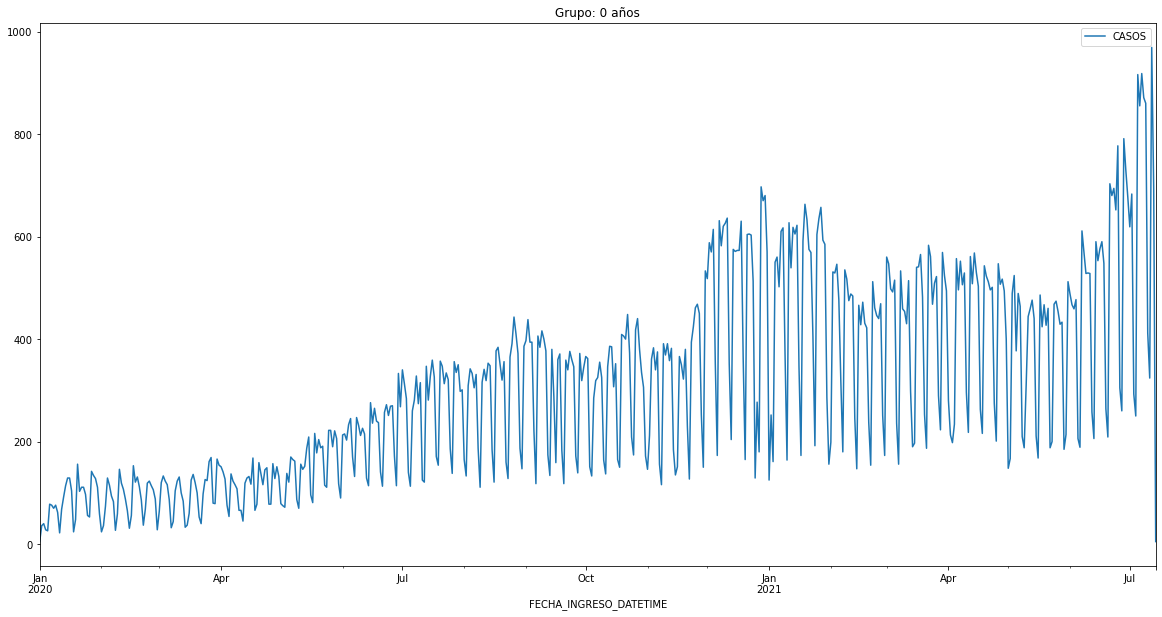

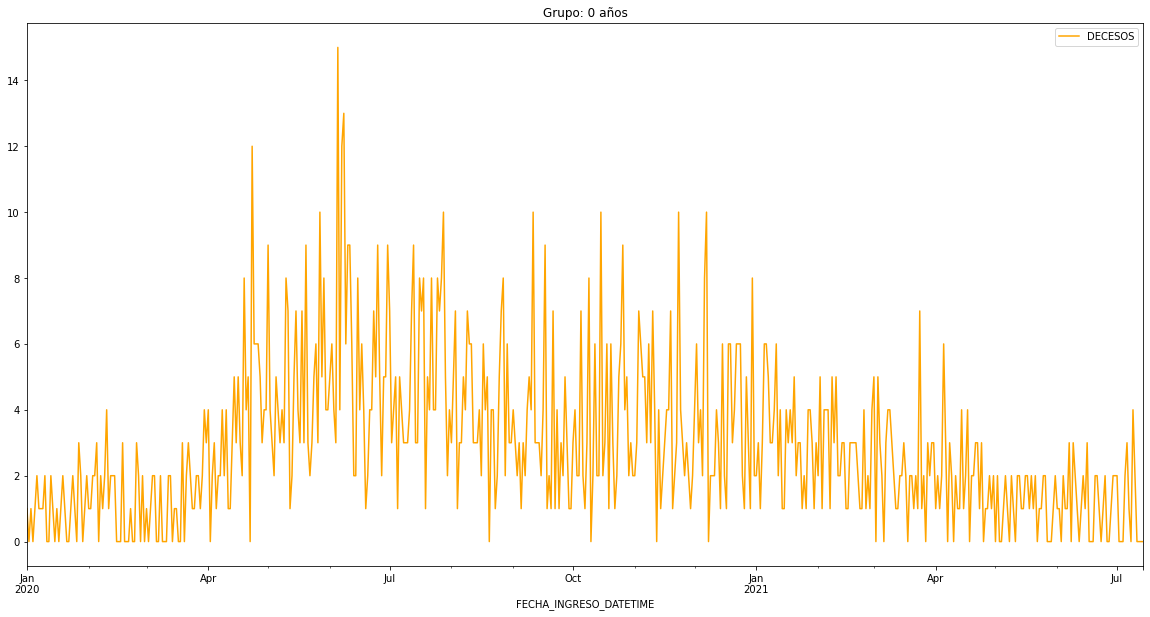

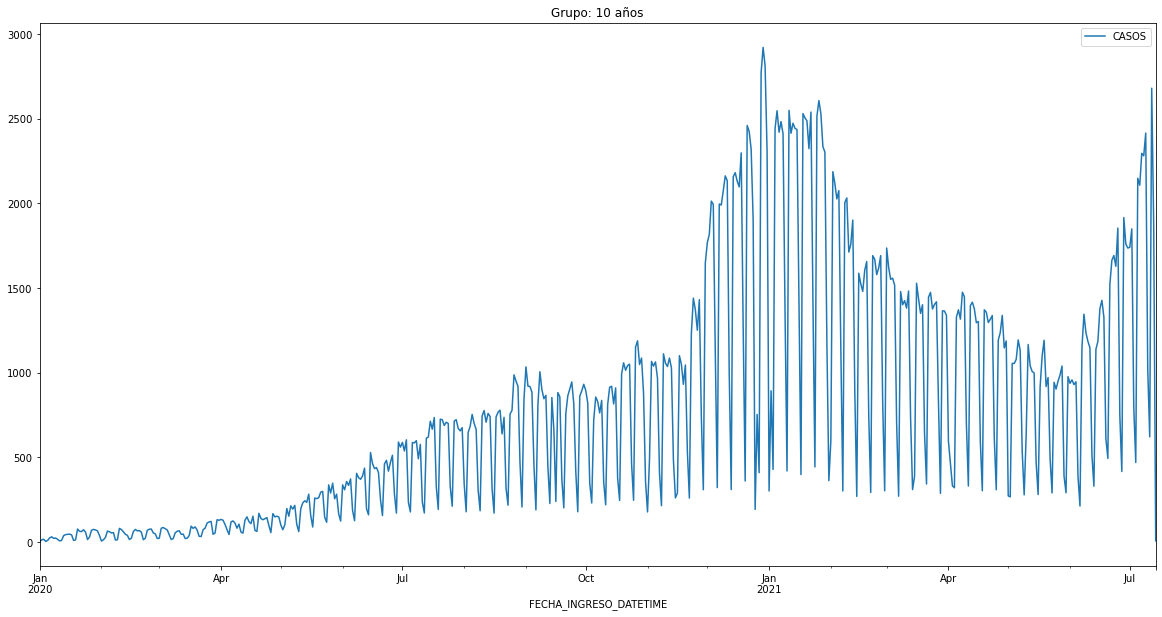

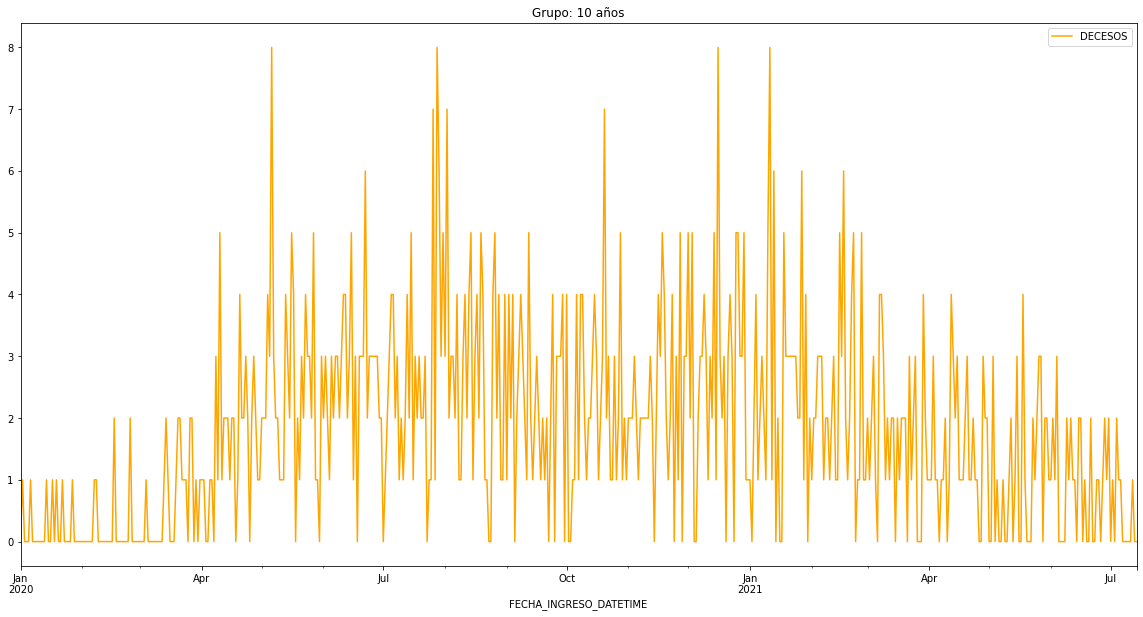

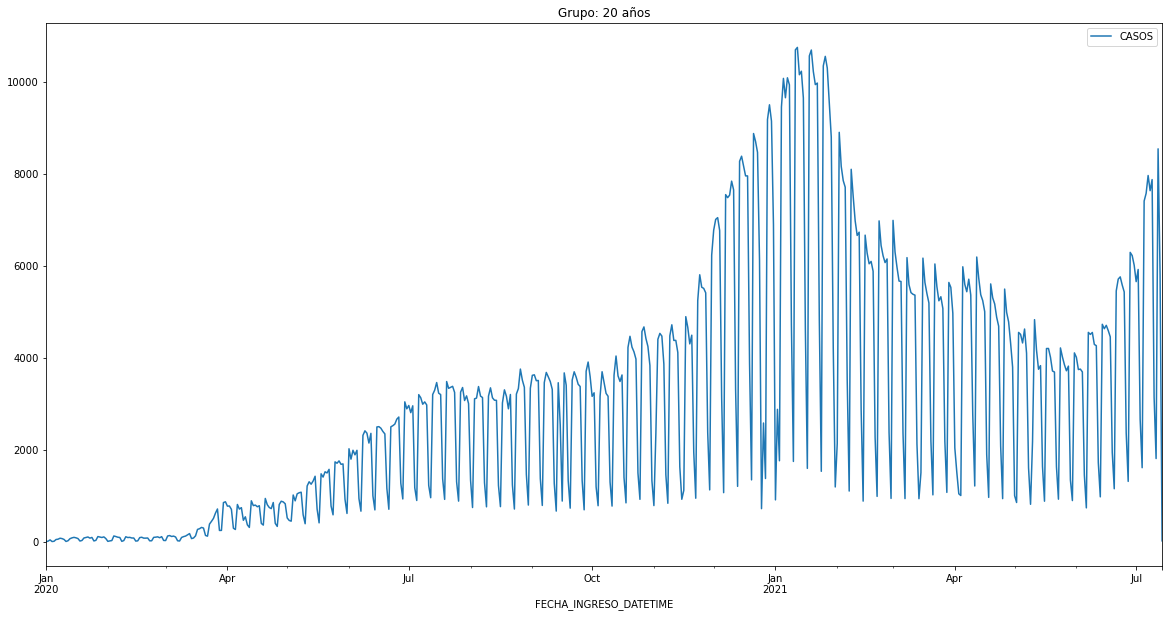

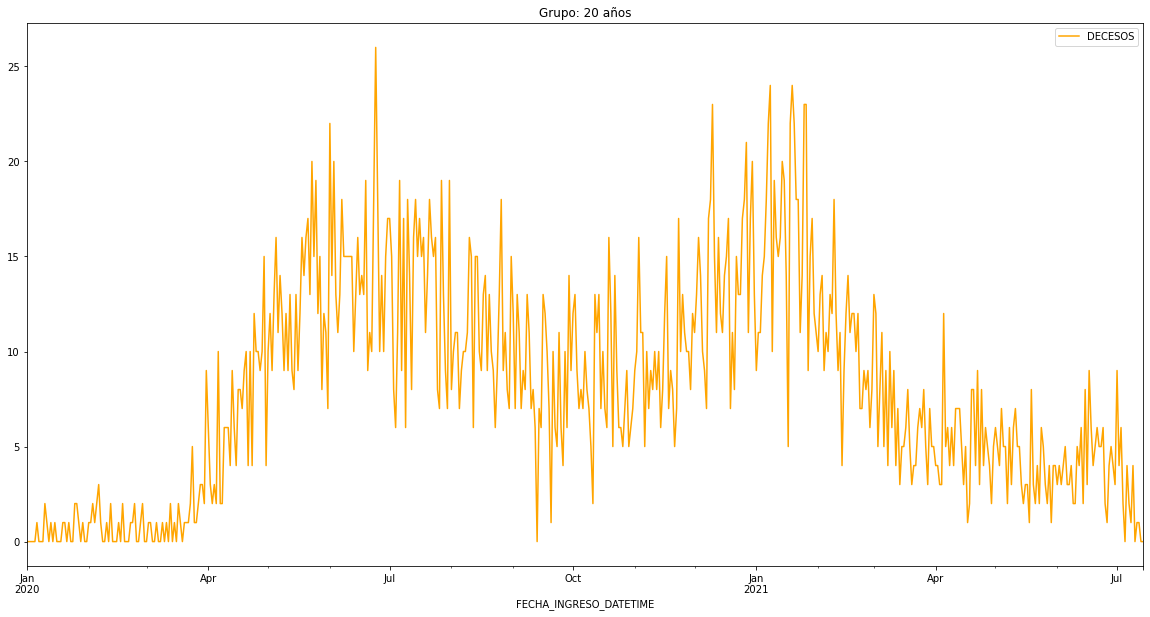

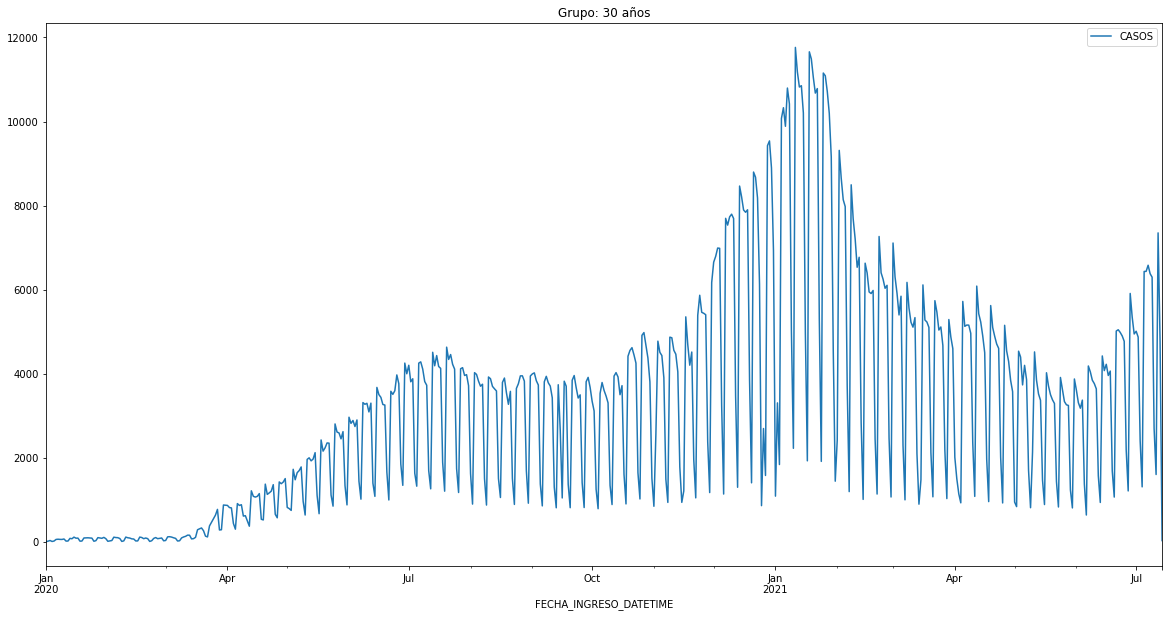

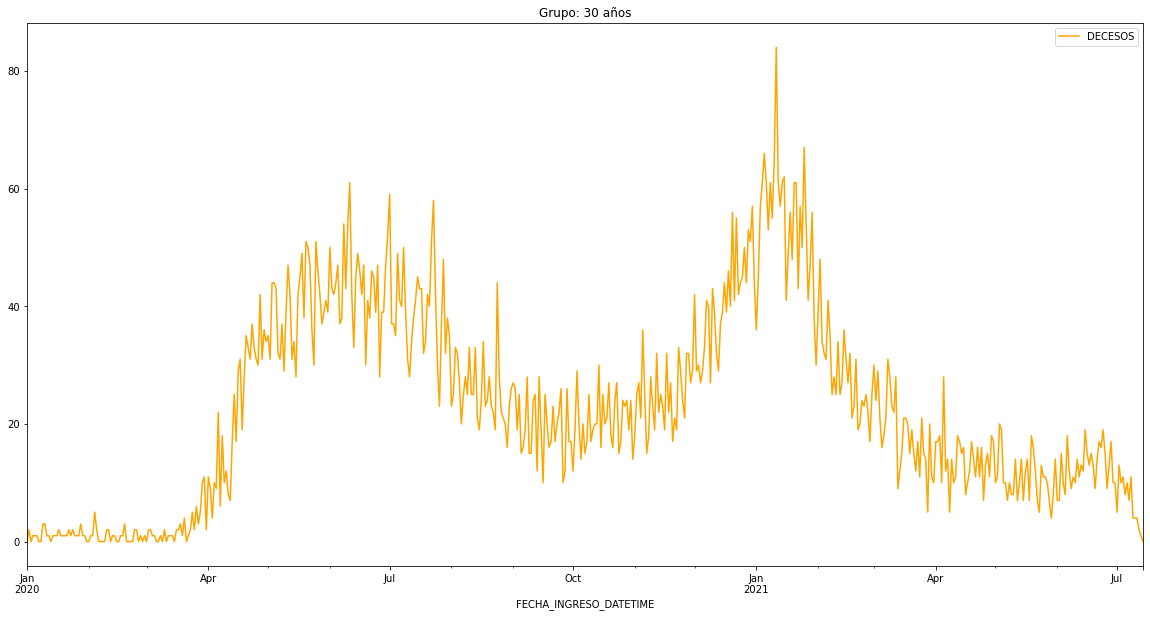

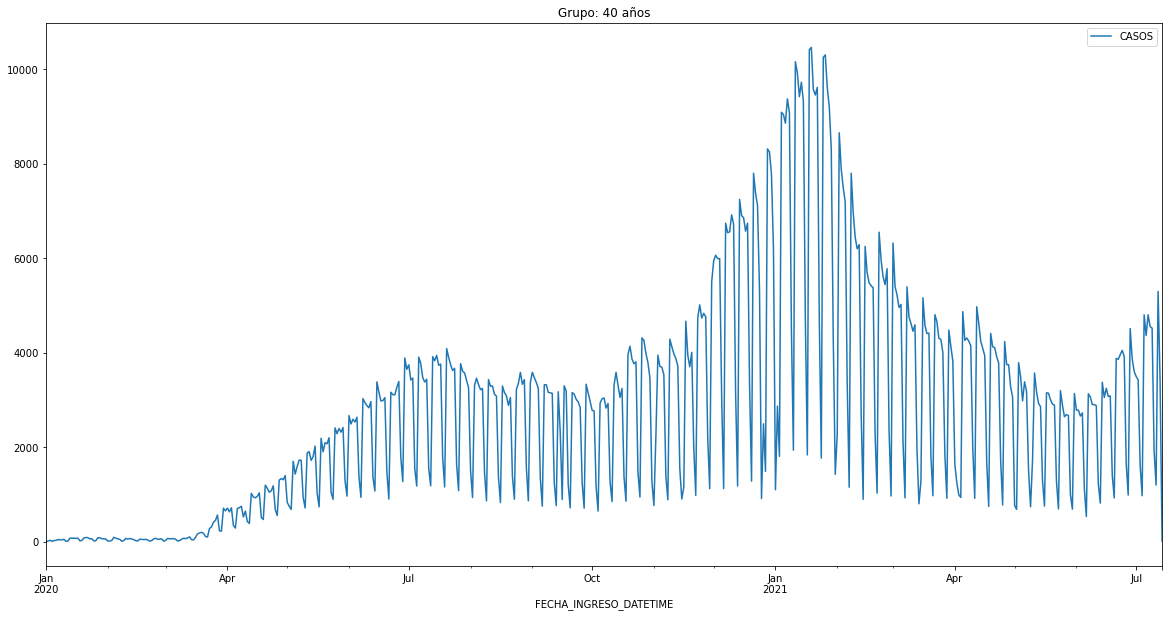

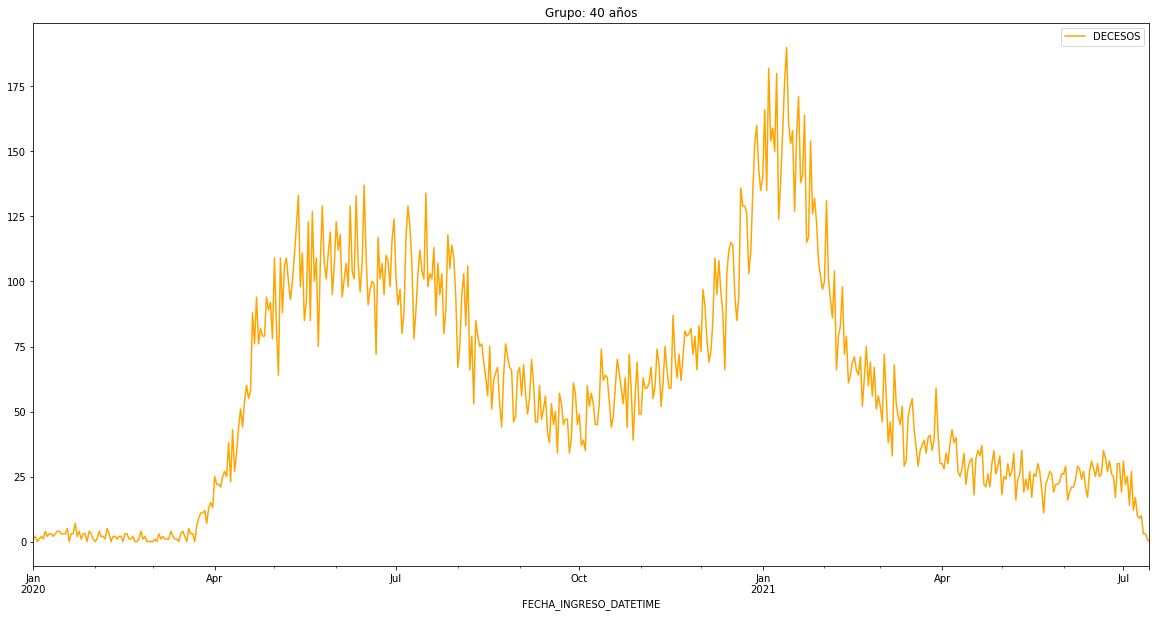

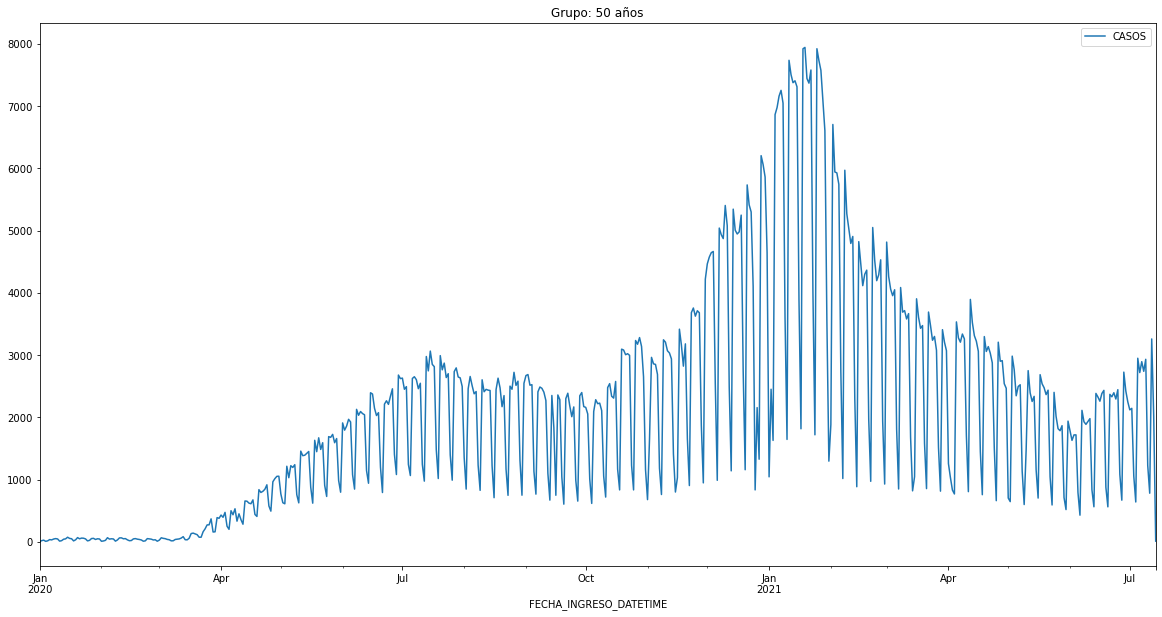

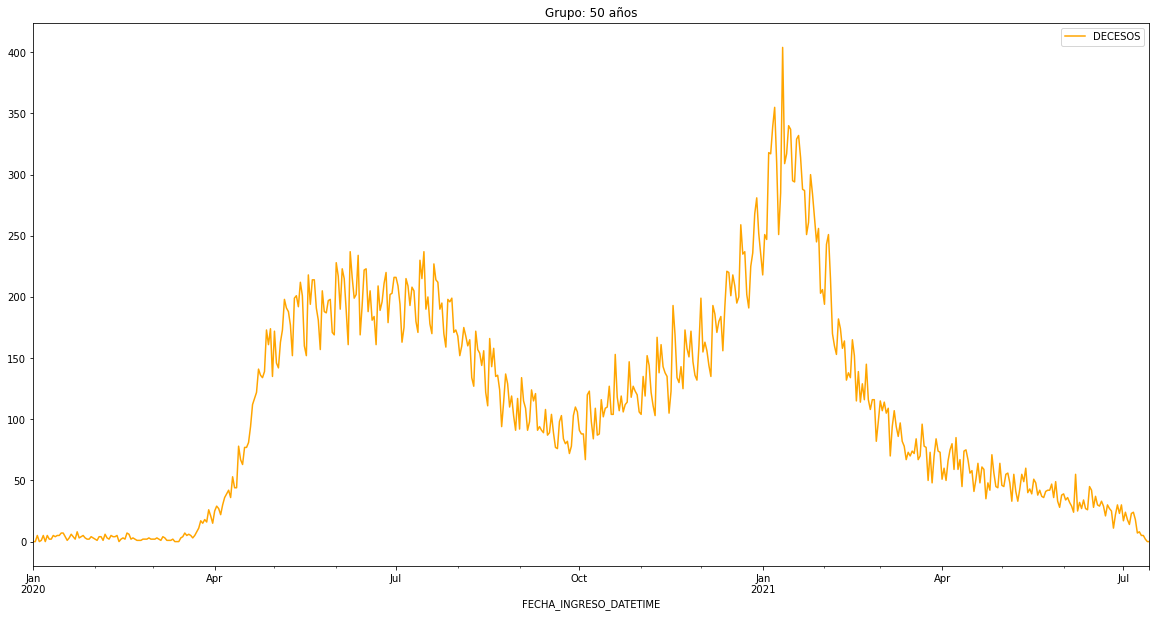

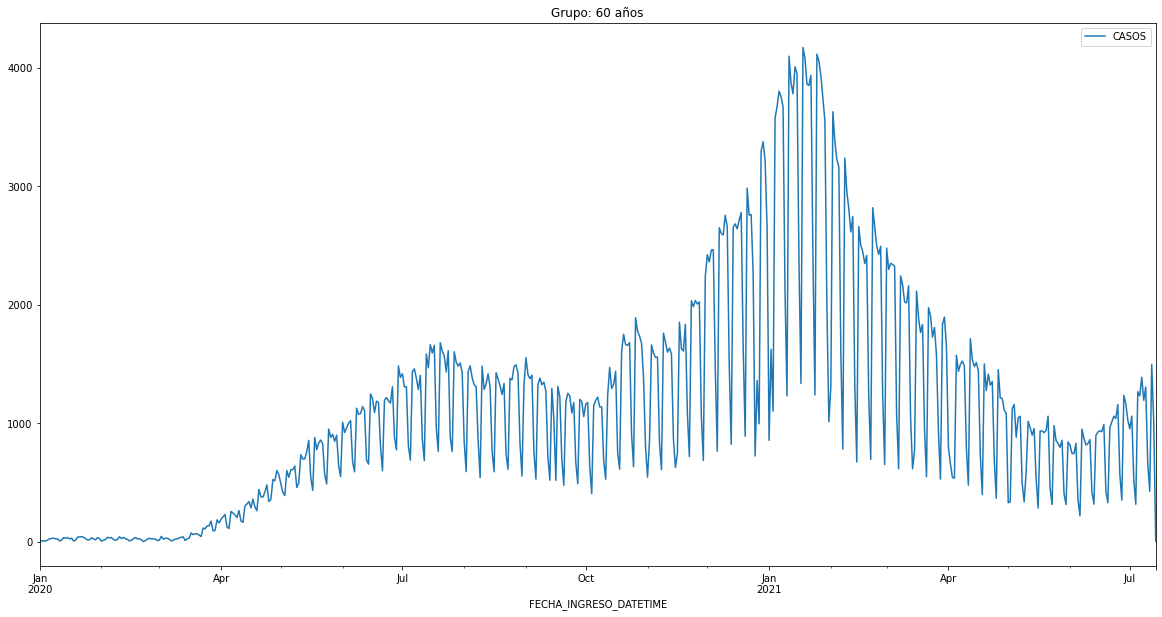

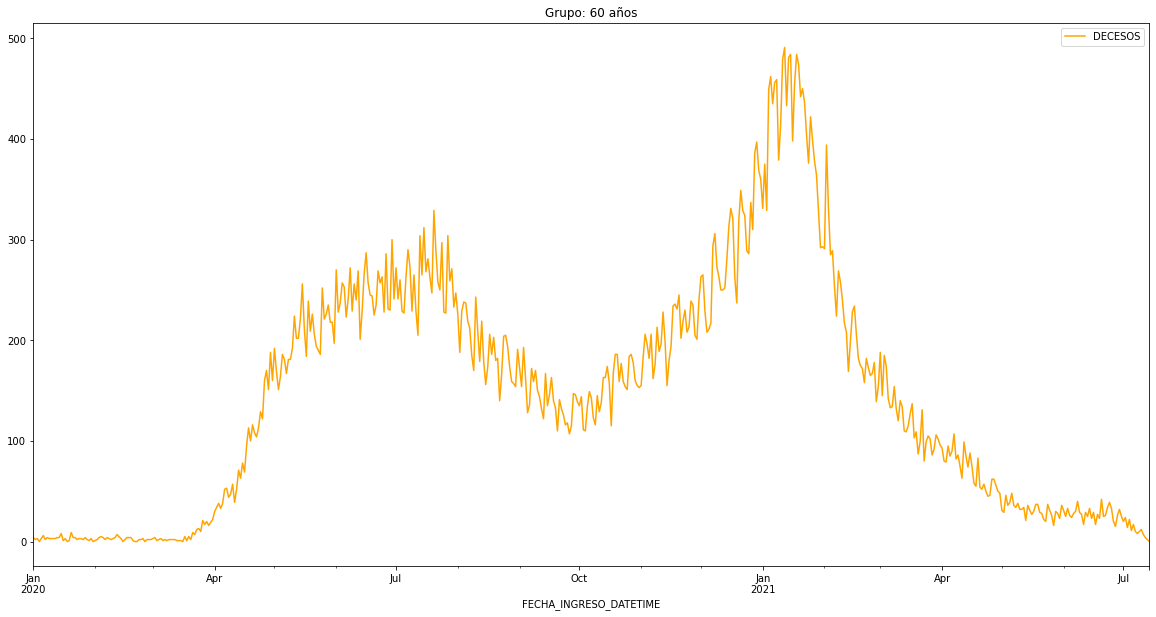

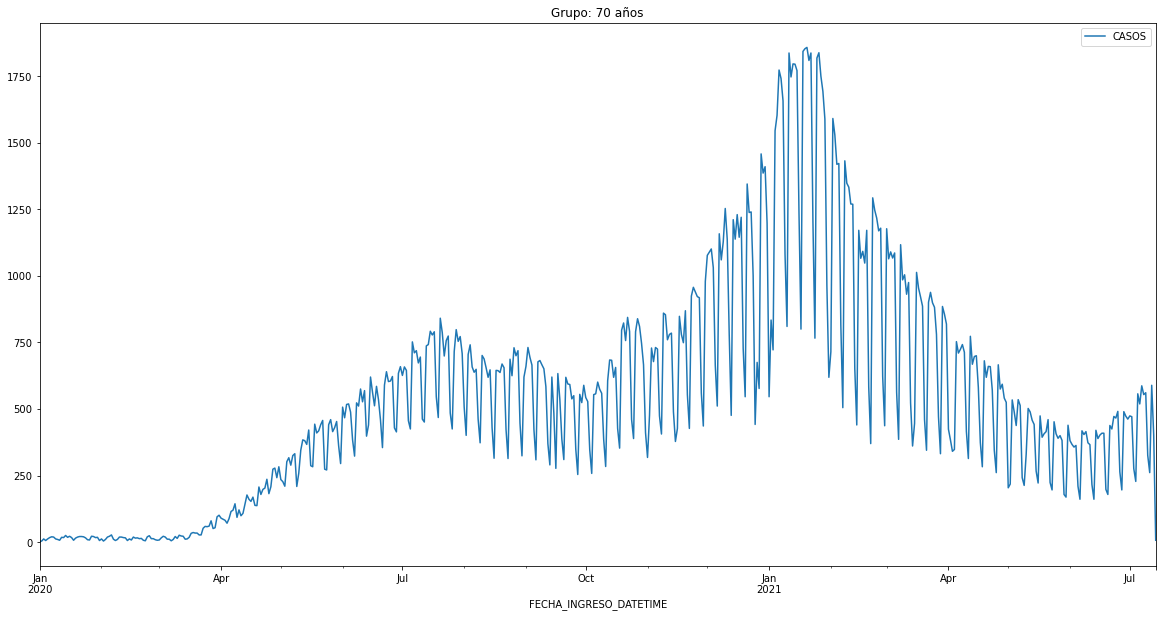

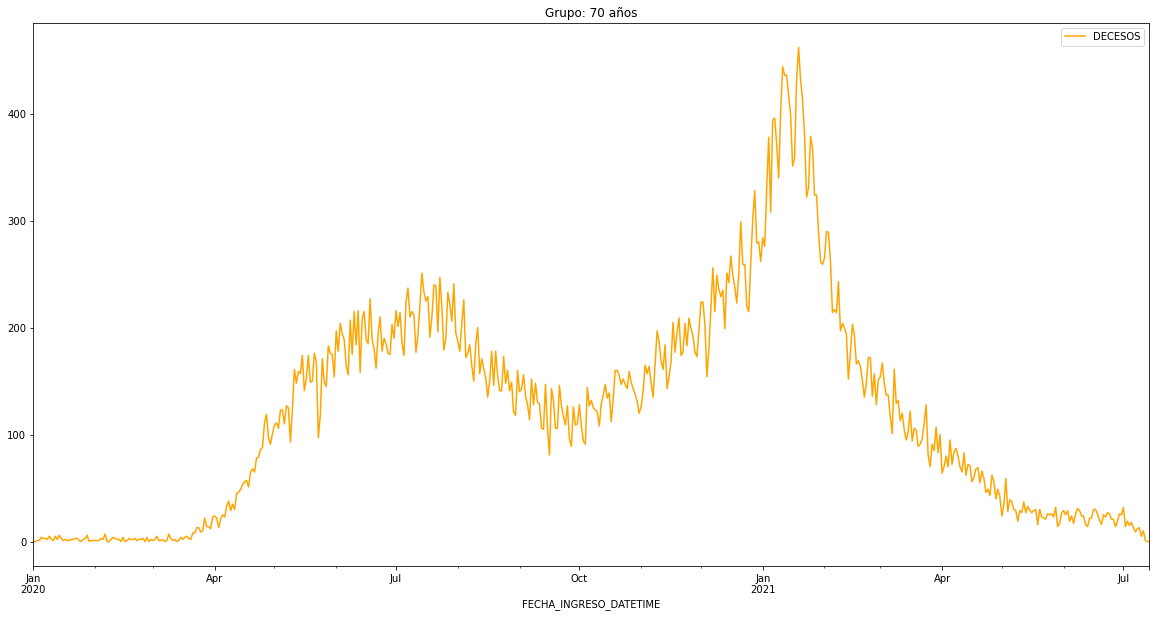

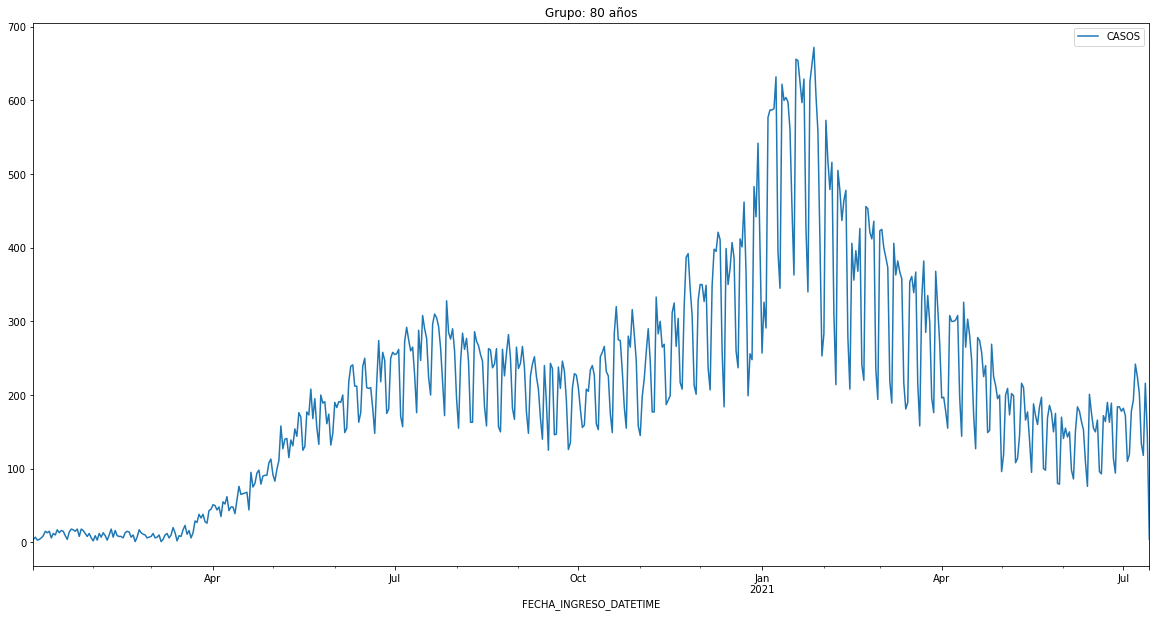

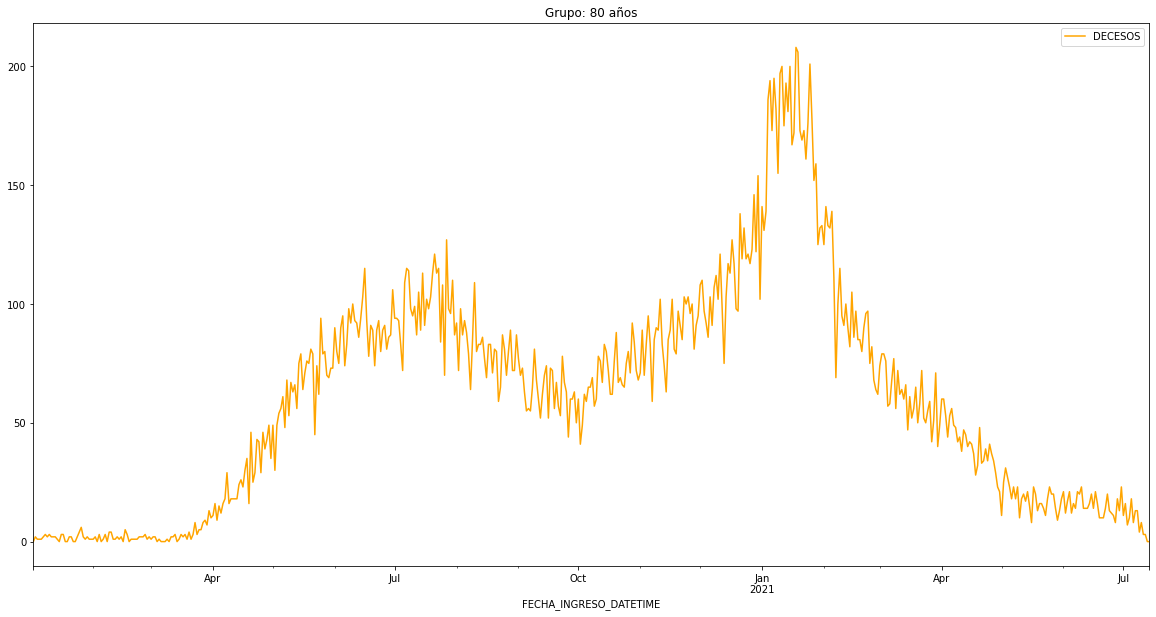

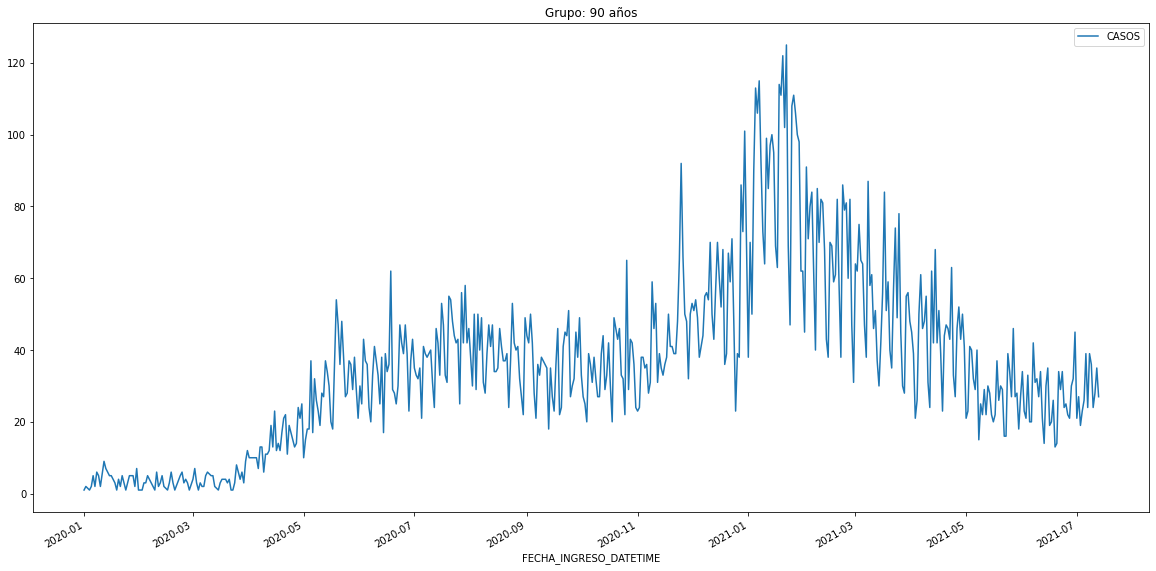

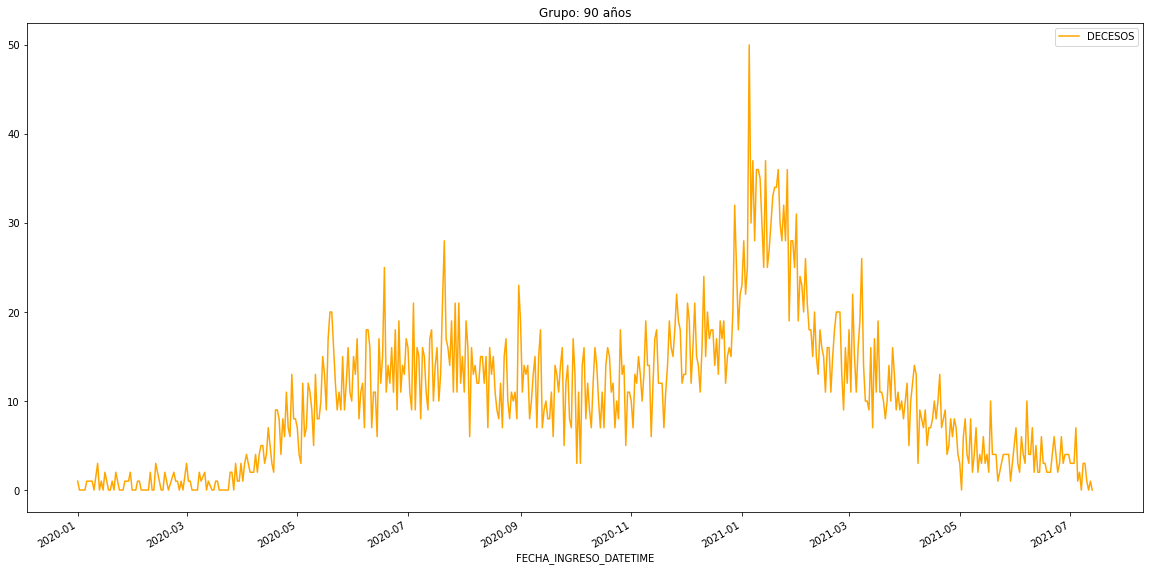

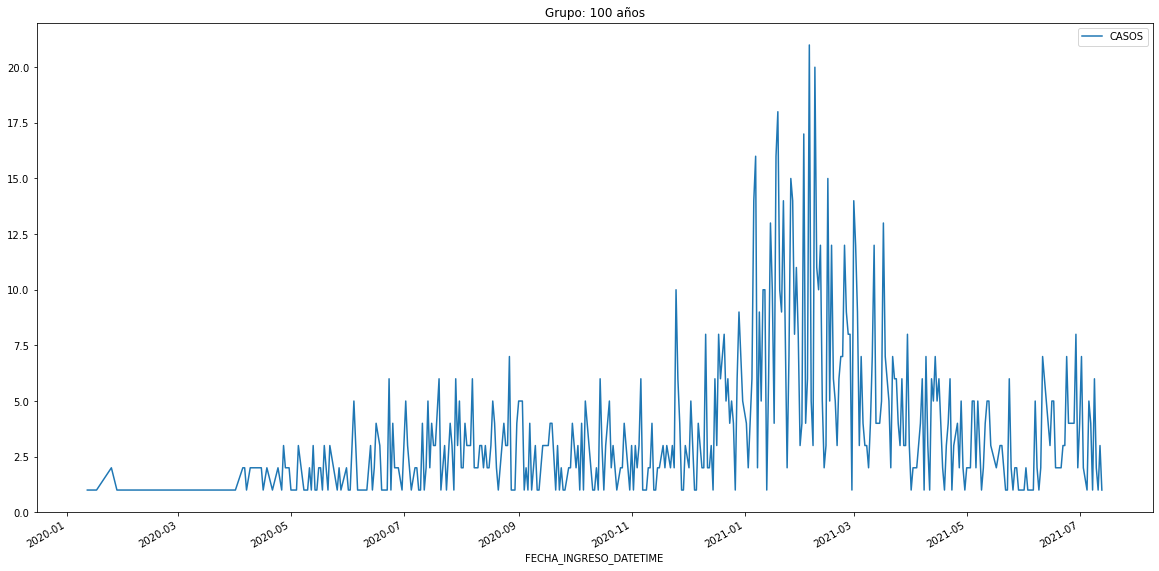

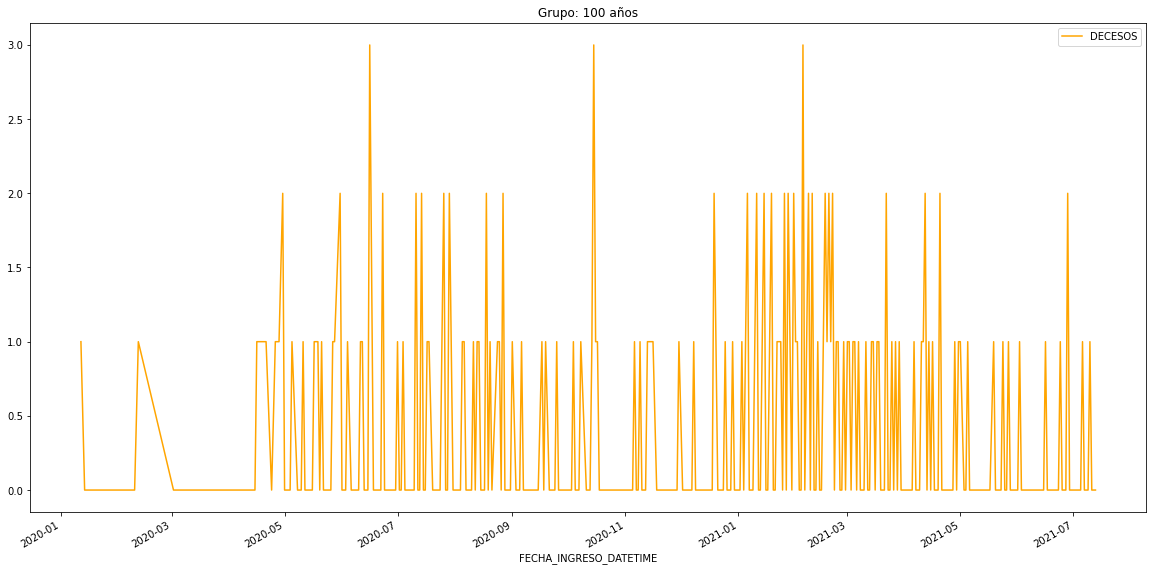

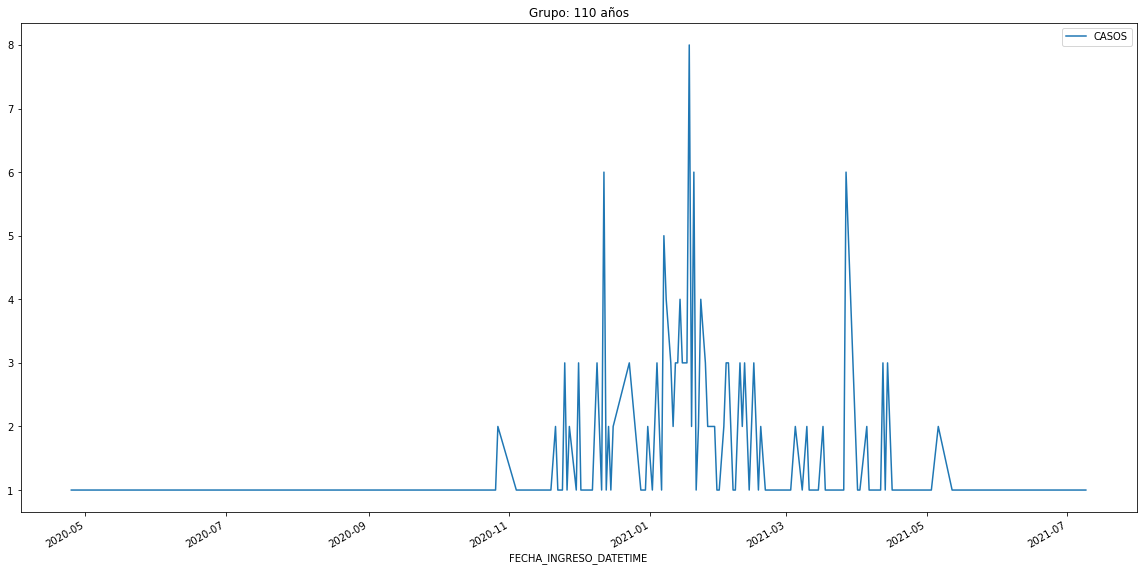

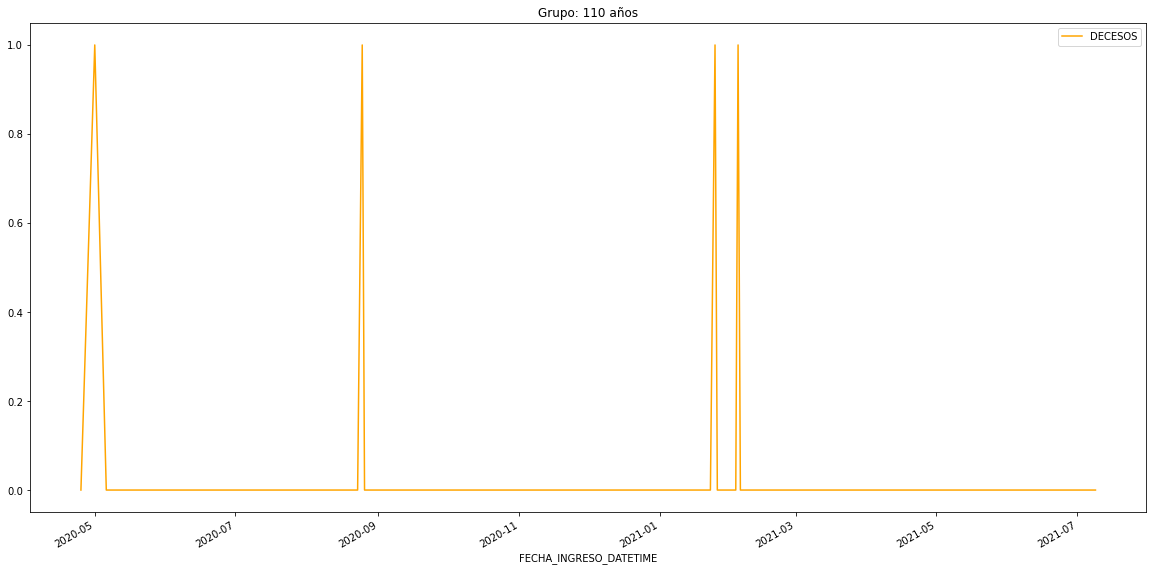

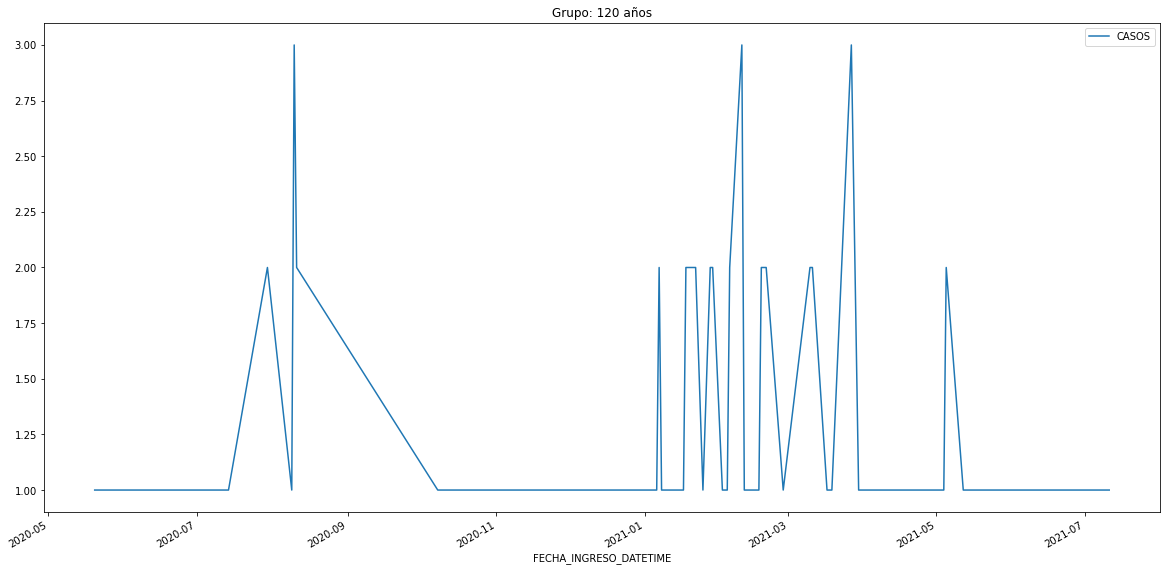

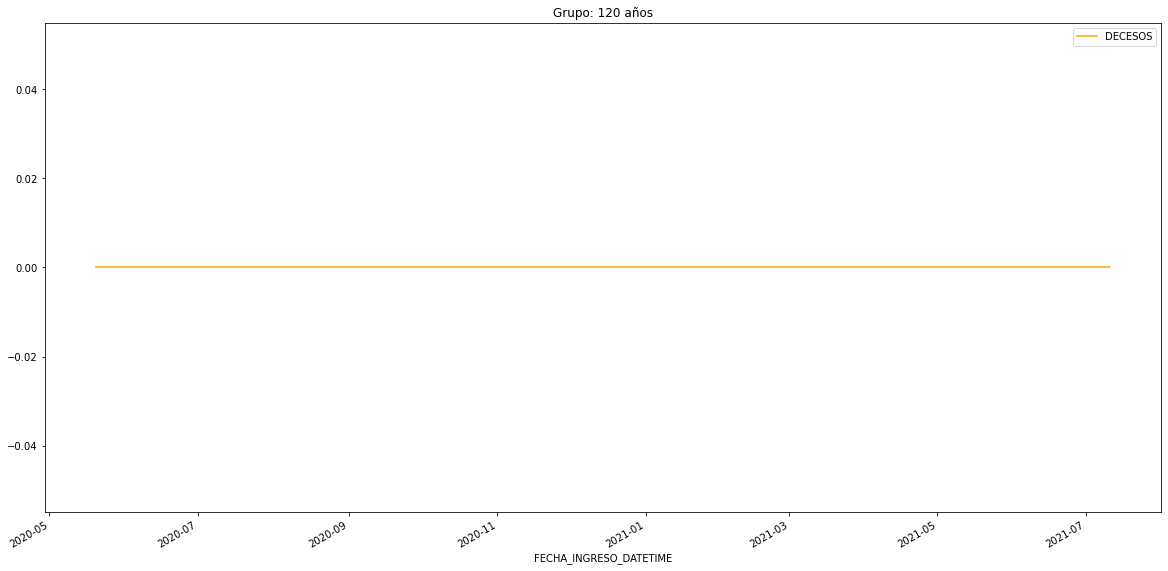

In [431]:
# final_covid19_df['DECESOS'].plot(legend=True, figsize=(20,10))
# final_covid19_df.get_group(40)

plt.close()
for group in final_covid19_df.groups:
#     print(group)
#     print(final_covid19_df.get_group(group)['CASOS'].head())
    plt.figure()
    final_covid19_df.get_group(group)['CASOS'].plot(title=f'Grupo: {group} años',legend=True, figsize=(20,10))
    plt.figure()
    final_covid19_df.get_group(group)['DECESOS'].plot(title=f'Grupo: {group} años', legend=True, figsize=(20,10), color = 'Orange')
    
#     for index, _ in enumerate(final_covid19_df['CASOS'][1:]):
#     #     print(casos, final_covid19_df['ACELERACION_CASOS_DIA'][index -1])
#     #    print(index)
#     #    print(final_covid19_df['CASOS'][index+1], final_covid19_df['CASOS'][index])
#         final_covid19_df['ACELERACION_CASOS_DIA'][index+1] = final_covid19_df['CASOS'][index+1] - final_covid19_df['CASOS'][index]
#         final_covid19_df['ACELERACION_DECESOS_DIA'][index+1] = final_covid19_df['DECESOS'][index+1] - final_covid19_df['DECESOS'][index]

#     #final_covid19_df.head(10)
#     #final_covid19_df['ACELERACION_CASOS']
#     final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y='ACELERACION_CASOS_DIA', figsize=(20,10))
#     final_covid19_df.plot(x='FECHA_INGRESO_DATETIME', y='ACELERACION_DECESOS_DIA', figsize=(20,10))